# **Handout 2: Unsupervised Learning (Problem 1)**
### *Author: Miruna Andreea Gheata*

***

### Table of Contents
   
* [1. Function definitions](#first-bullet)
   *  [1.1. Plotting functions](#first-first-bullet)
   *  [1.2. Computing functions](#first-second-bullet)
* [2. Clustering the data from ds101.txt](#second-bullet)
   *  [2.1. Building the clusters](#second-first-bullet)
        * [2.1.1. Single-linkage](#second-first-first-bullet)
        * [2.1.2. Complete-linkage](#second-first-second-bullet)
        * [2.1.3. Average-linkage](#second-first-third-bullet)
        * [2.1.4. Ward](#second-first-fourth-bullet)
   *  [2.2. Best number of clusters for each algorithm](#second-second-bullet)
   *  [2.3. Best algorithm and number of clusters](#second-third-bullet)
        * [2.3.1. V-measure](#second-first-first-bullet)
        * [2.3.2. Davies-Bouldin](#second-first-second-bullet)
* [3. Clustering the data from ds201.txt](#third-bullet)
   *  [3.1. Building the clusters](#third-first-bullet)
        * [3.1.1 Single-linkage](#third-first-first-bullet)
        * [3.1.2. Complete-linkage](#third-first-second-bullet)
        * [3.1.3. Average-linkage](#third-first-third-bullet)
        * [3.1.4. Ward](#third-first-fourth-bullet)
   *  [3.2. Best number of clusters for each algorithm](#third-second-bullet)
   *  [3.3. Best algorithm and number of clusters](#third-third-bullet)
        * [3.3.1. V-measure](#third-first-first-bullet)
        * [3.3.2. Davies-Bouldin](#third-first-second-bullet)
***

In this exercise we will **study the different clustering algorithms** by applying them to 2 datasets, one where the clusters are separated from each other and another where the clusters are overlapped. The different algorithms used are:

- **Single-linkage:** Based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that **contain the closest pair** of elements not yet belonging to the same cluster as each other.

- **Complete-linkage:** At the beginning of the process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters until all elements end up being in the same cluster. The method is also known as *farthest neighbour clustering*. The result of the clustering can be visualized as a dendrogram, which shows the sequence of cluster fusion and the distance at which each fusion took place.

- **Average-linkage:**  The distance between two clusters is defined as the **average of distances between all pairs** of objects, where each pair is made up of one object from each group. 

- **Ward algorithm**: In statistics, Ward's method is a criterion applied in hierarchical cluster analysis. Ward's minimum variance method is a special case of the objective function approach originally presented by Joe H. Ward, Jr. Ward suggested a general agglomerative hierarchical clustering procedure, where the criterion for choosing the pair of clusters to merge at each step is **based on the optimal value of an objective function**. This objective function could be "any function that reflects the investigator's purpose." Many of the standard clustering procedures are contained in this very general class. To illustrate the procedure, Ward used the example where the objective function is the error sum of squares, and this example is known as Ward's method or more precisely Ward's minimum variance method.
***

### *0.1. Library imports*

In [1]:
import math
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_completeness_v_measure

## **1. Function definitions** <a class="anchor" id="first-bullet"></a>

### **1.1. Plotting functions** <a class="anchor" id="first-first-bullet"></a>

In [2]:
def scatter_plot(X, y, title, xlabel, ylabel):
    '''
    Plots the clusters of points. 
    '''
    plt.figure(1)
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], marker='+', color= '#FF4500', label='class 1')
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], marker='*', color= '#3CB371', label='class 2')
    plt.scatter(X[np.where(y == 2)[0]][:,0], X[np.where(y == 2)[0]][:,1], marker='.', color= '#90CAF9', label='class 3')  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [3]:
def random_color():
    '''
    Returns a random RGB color.
    '''
    r = random.random()
    b = random.random()
    g = random.random()
    # Creates the color object
    color = (r, g, b)
    return color

In [4]:
def show_clusters(X, y, labels, algorithm):
    '''
    Plots the clusters found with a certain algorithm. 
    '''
    for m in range(0, len(np.unique(labels))):
        plt.scatter(X[labels==m, 0], X[labels==m, 1], s=50, marker='o', c=np.array([random_color()]), label=f"Cluster {m}")
        plt.title(f"Clustering with {algorithm}-linkage algorithm\n({len(np.unique(labels))} clusters)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.show()

***

### **1.2. Computing functions** <a class="anchor" id="first-second-bullet"></a>

In [5]:
def calculate_clusters(X, y, n_clusters, linkage):
    '''
    Finds the clusters by applying AgglomerativeClustering with the given linkage. 
    '''
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage)
    model.fit(X)
    # Plots the predicted clusters.
    show_clusters(X, y, model.labels_, linkage)
    # Computes the V-measure. 
    model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), model.labels_)
    # Computes the Davies-Bouldin score. 
    model_davies_bouldin = davies_bouldin_score(X, model.labels_)
    print(f"V-Measure: {model_vmeasure}")
    print(f"Davies-Bouldin score: {model_davies_bouldin}")
    return model.labels_, model_vmeasure, model_davies_bouldin

***

## **2. Clustering the data from ds101.txt** <a class="anchor" id="second-bullet"></a>

In [6]:
group = '10'
ds = 1
data = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X = data[:, 0:2]
y = data[:, 2:3]

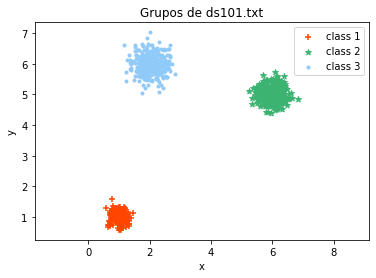

In [7]:
scatter_plot(X, y, "Grupos de ds101.txt", "x", "y")

The data that we have clustered is clearly separated in **3 distinctive groups**.

### **2.1. Building the clusters** <a class="anchor" id="second-first-bullet"></a>

In [8]:
# List of different clusters to try with each algorithm
clusters = [2, 3, 4, 5]
# List of different clustering algorithms that will be used
algorithms = ["single", "complete", "average", "ward"]

#### **2.1.1. Single-linkage** <a class="anchor" id="second-first-first-bullet"></a>

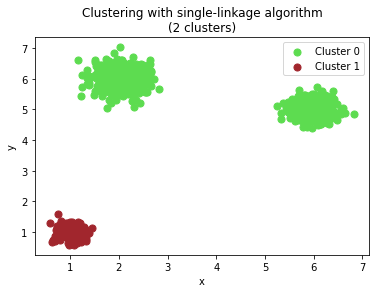

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [9]:
model_single_2_labels, model_single_2_vmeasure, model_single_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[0])

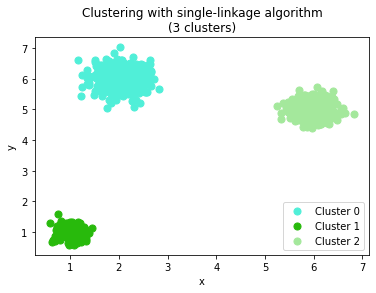

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [10]:
model_single_3_labels, model_single_3_vmeasure, model_single_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[0])

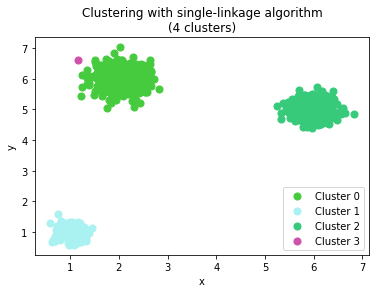

V-Measure: 0.9969117290146539
Davies-Bouldin score: 0.2621154058467507


In [11]:
model_single_4_labels, model_single_4_vmeasure, model_single_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[0])

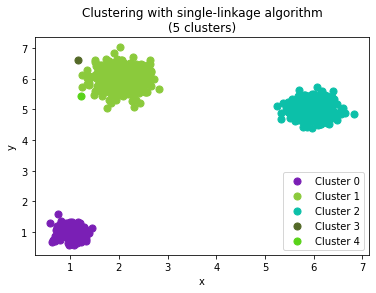

V-Measure: 0.9938438281550861
Davies-Bouldin score: 0.2969585290526567


In [12]:
model_single_5_labels, model_single_5_vmeasure, model_single_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[0])

In [13]:
model_single_vmeasures = [model_single_2_vmeasure,
                          model_single_3_vmeasure,
                          model_single_4_vmeasure,
                          model_single_5_vmeasure]

model_single_davies_bouldin = [model_single_2_davies_bouldin,
                               model_single_3_davies_bouldin,
                               model_single_4_davies_bouldin,
                               model_single_5_davies_bouldin]

In [14]:
df_single_measures = pd.DataFrame(data=[model_single_vmeasures, model_single_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_single_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.734017,1.000000,0.996912,0.993844
Davies-Bouldin,0.419079,0.151567,0.262115,0.296959


The single-linkage algorithm has given the best results for both measures (V-measure and Davies-Bouldin) with the clustering made with 3 groups. This makes sense as the data is clearly separated in 3 different groups.

#### **2.1.2. Complete-linkage** <a class="anchor" id="second-first-second-bullet"></a>

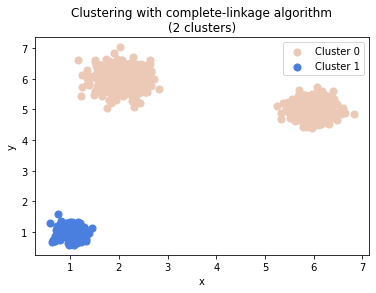

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [15]:
model_complete_2_labels, model_complete_2_vmeasure, model_complete_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[1])

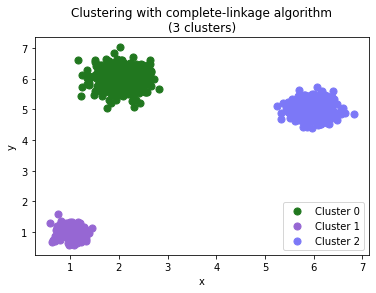

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [16]:
model_complete_3_labels, model_complete_3_vmeasure, model_complete_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[1])

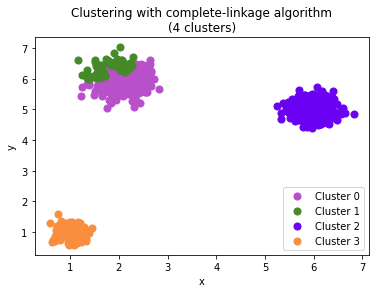

V-Measure: 0.9266781025539667
Davies-Bouldin score: 0.7353809498525187


In [17]:
model_complete_4_labels, model_complete_4_vmeasure, model_complete_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[1])

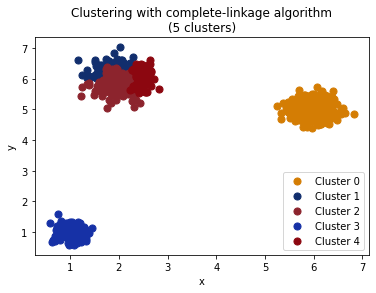

V-Measure: 0.8735361044165668
Davies-Bouldin score: 0.7566263293994333


In [18]:
model_complete_5_labels, model_complete_5_vmeasure, model_complete_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[1])

In [19]:
model_complete_vmeasures = [model_complete_2_vmeasure,
                            model_complete_3_vmeasure,
                            model_complete_4_vmeasure,
                            model_complete_5_vmeasure]

model_complete_davies_bouldin = [model_complete_2_davies_bouldin,
                                 model_complete_3_davies_bouldin,
                                 model_complete_4_davies_bouldin,
                                 model_complete_5_davies_bouldin]

In [20]:
df_complete_measures = pd.DataFrame(data=[model_complete_vmeasures, model_complete_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_complete_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.734017,1.000000,0.926678,0.873536
Davies-Bouldin,0.419079,0.151567,0.735381,0.756626


The complete-linkage algorithm has the best results when clustering the data in 3 groups, just as with the single-linkage algorithm.

#### **2.1.3. Average-linkage** <a class="anchor" id="second-first-third-bullet"></a>

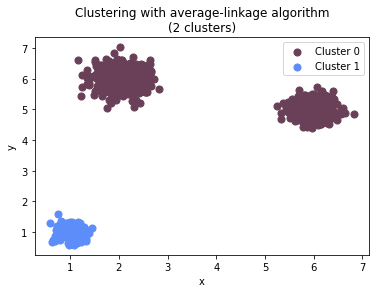

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [21]:
model_average_2_labels, model_average_2_vmeasure, model_average_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[2])

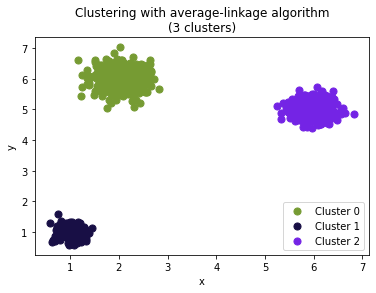

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [22]:
model_average_3_labels, model_average_3_vmeasure, model_average_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[2])

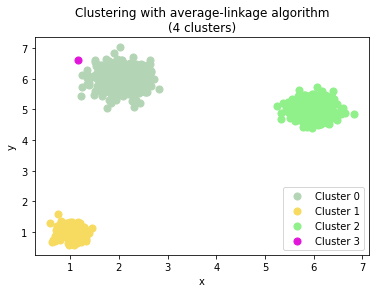

V-Measure: 0.9969117290146539
Davies-Bouldin score: 0.2621154058467507


In [23]:
model_average_4_labels, model_average_4_vmeasure, model_average_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[2])

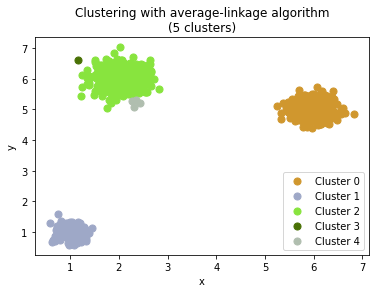

V-Measure: 0.987213883742774
Davies-Bouldin score: 0.3617344652425027


In [24]:
model_average_5_labels, model_average_5_vmeasure, model_average_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[2])

In [25]:
model_average_vmeasures = [model_average_2_vmeasure,
                           model_average_3_vmeasure,
                           model_average_4_vmeasure,
                           model_average_5_vmeasure]

model_average_davies_bouldin = [model_average_2_davies_bouldin,
                                model_average_3_davies_bouldin,
                                model_average_4_davies_bouldin,
                                model_average_5_davies_bouldin]

In [26]:
df_average_measures = pd.DataFrame(data=[model_average_vmeasures, model_average_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_average_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.734017,1.000000,0.996912,0.987214
Davies-Bouldin,0.419079,0.151567,0.262115,0.361734


Just as with the other two algorithms, the average-linkage algorithm has given the best results when clustering the data in 3 groups.

#### **2.1.4. Ward-linkage** <a class="anchor" id="second-first-fourth-bullet"></a>

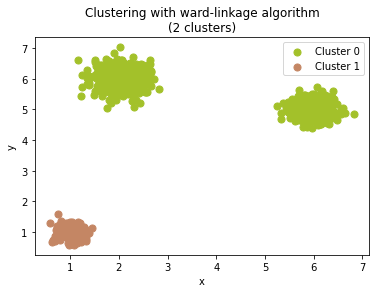

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [27]:
model_ward_2_labels, model_ward_2_vmeasure, model_ward_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[3])

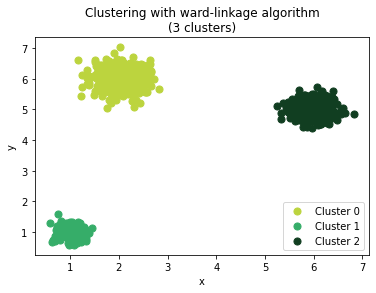

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [28]:
model_ward_3_labels, model_ward_3_vmeasure, model_ward_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[3])

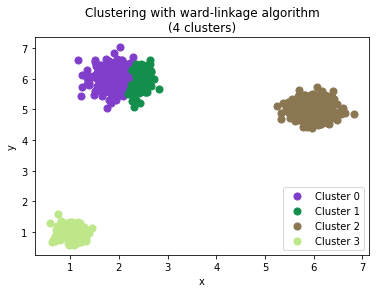

V-Measure: 0.9252013364680173
Davies-Bouldin score: 0.6480543681522039


In [29]:
model_ward_4_labels, model_ward_4_vmeasure, model_ward_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[3])

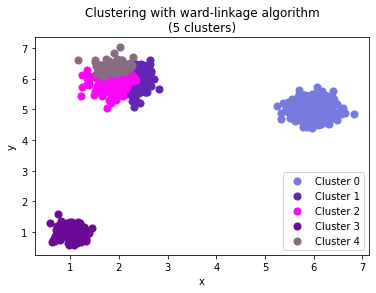

V-Measure: 0.8656011478166047
Davies-Bouldin score: 0.7085937696961049


In [30]:
model_ward_5_labels, model_ward_5_vmeasure, model_ward_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[3])

In [31]:
model_ward_vmeasures = [model_ward_2_vmeasure,
                        model_ward_3_vmeasure,
                        model_ward_4_vmeasure,
                        model_ward_5_vmeasure]

model_ward_davies_bouldin = [model_ward_2_davies_bouldin,
                             model_ward_3_davies_bouldin,
                             model_ward_4_davies_bouldin,
                             model_ward_5_davies_bouldin]

In [32]:
df_ward_measures = pd.DataFrame(data=[model_ward_vmeasures, model_ward_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_ward_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.734017,1.000000,0.925201,0.865601
Davies-Bouldin,0.419079,0.151567,0.648054,0.708594


Finally, this last algorithm has also given the best results when clustering the given data in 3 groups. 

In [33]:
model_vmeasures = [model_single_vmeasures, model_complete_vmeasures, model_average_vmeasures, model_ward_vmeasures]
model_davies_bouldin = [model_single_davies_bouldin,
                        model_complete_davies_bouldin,
                        model_average_davies_bouldin,
                        model_ward_davies_bouldin]

### **2.2. Best number of clusters for each algorithm** <a class="anchor" id="second-second-bullet"></a>

Now, let's compare the different measures and find the best clustering for each algorithm.

In [34]:
data_best_clusters = [["Single-linkage", clusters[model_single_vmeasures.index(max(model_single_vmeasures))], clusters[model_single_davies_bouldin.index(min(model_single_davies_bouldin))]],
                      ["Complete-linkage", clusters[model_complete_vmeasures.index(max(model_complete_vmeasures))], clusters[model_complete_davies_bouldin.index(min(model_complete_davies_bouldin))]], 
                      ["Average-linkage", clusters[model_average_vmeasures.index(max(model_average_vmeasures))], clusters[model_average_davies_bouldin.index(min(model_average_davies_bouldin))]],
                      ["Ward", clusters[model_ward_vmeasures.index(max(model_ward_vmeasures))], clusters[model_ward_davies_bouldin.index(min(model_ward_davies_bouldin))]]]
df_best_clusters = pd.DataFrame(data_best_clusters, columns = ["Algorithm", "V-Measure", "Davies-Bouldin"])

In [35]:
dfStyler = df_best_clusters.style.set_properties(**{'text-align': 'center'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Algorithm,V-Measure,Davies-Bouldin
0,Single-linkage,3,3
1,Complete-linkage,3,3
2,Average-linkage,3,3
3,Ward,3,3


For all the given algorithms, the clustering made with 3 groups gives the best results, and it matches with the number of original groups found in the data. This means that, for any given agglomerative clustering algorithm, the data points can be separated correctly in the appropiate number of clusters (the original number of clusters) as long as the points from each clusters are completely separated.   

### **2.3. Best algorithm and number of clusters** <a class="anchor" id="second-third-bullet"></a>

#### **2.3.1. V-Measure** <a class="anchor" id="second-third-first-bullet"></a>

In [36]:
max_vmeasure = [max(model_single_vmeasures), max(model_complete_vmeasures), max(model_average_vmeasures), max(model_ward_vmeasures)]
max_vmeasure

[1.0, 1.0, 1.0, 1.0]

#### **2.3.2. Davies-Bouldin Score** <a class="anchor" id="second-third-second-bullet"></a>

In [37]:
min_davies_bouldin = [min(model_single_davies_bouldin), min(model_complete_davies_bouldin), min(model_average_davies_bouldin), min(model_ward_davies_bouldin)]
min_davies_bouldin

[0.15156697808053668,
 0.15156697808053668,
 0.15156697808053668,
 0.15156697808053668]

It is not possible to chose the best model because they all have given the same measure results. The contingency table below is created with the single-linkage algorithm with 3 clusters, but all the other algorithms with 3 clusters have the same contingency table.

In [38]:
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), model_single_3_labels)
cm

array([[  0, 334,   0],
       [  0,   0, 333],
       [333,   0,   0]])

***

## **3. Clustering the data from ds102.txt** <a class="anchor" id="third-bullet"></a>

In [39]:
group = '10'
ds = 2
data_2 = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X_2 = data_2[:, 0:2]
y_2 = data_2[:, 2:3]

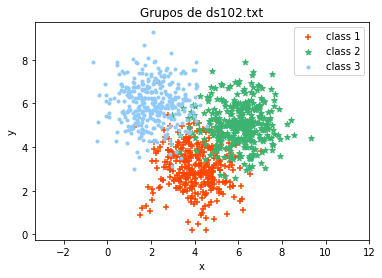

In [40]:
scatter_plot(X_2, y_2, "Grupos de ds102.txt", "x", "y")

This second dataset has 3 clusters as well; however, **the clusters overlap each other**. It will be interesting to compare the results of each algorithm and see if either one of them give better results, because in the previous case all the model's perfomance was the same.

### **3.1. Building the clusters** <a class="anchor" id="third-first-bullet"></a>

#### **3.1.1. Single-linkage** <a class="anchor" id="third-first-first-bullet"></a>

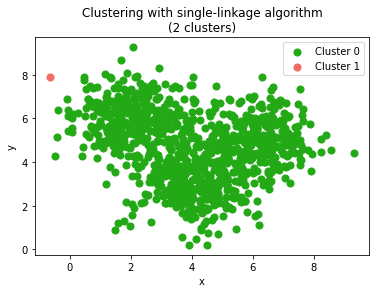

V-Measure: 0.0019893306531079003
Davies-Bouldin score: 0.40049020066084595


In [41]:
model_single_2_labels, model_single_2_vmeasure, model_single_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[0])

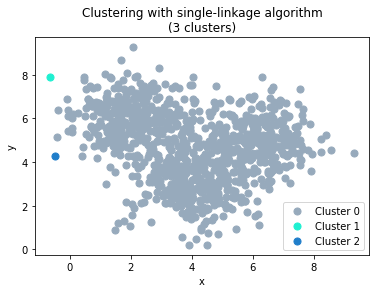

V-Measure: 0.0039540439393072925
Davies-Bouldin score: 0.46667193115907574


In [42]:
model_single_3_labels, model_single_3_vmeasure, model_single_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[0])

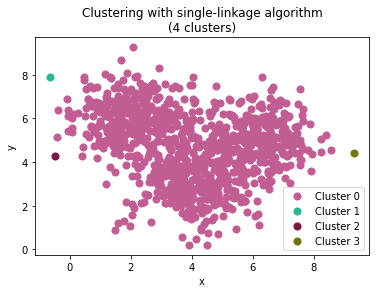

V-Measure: 0.005883928586455491
Davies-Bouldin score: 0.457484685594304


In [43]:
model_single_4_labels, model_single_4_vmeasure, model_single_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[0])

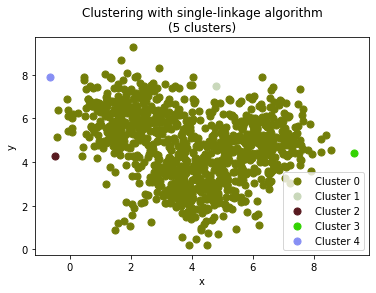

V-Measure: 0.007790378690050794
Davies-Bouldin score: 0.5772412694035991


In [44]:
model_single_5_labels, model_single_5_vmeasure, model_single_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[0])

In [45]:
model_single_vmeasures = [model_single_2_vmeasure,
                          model_single_3_vmeasure,
                          model_single_4_vmeasure,
                          model_single_5_vmeasure]

model_single_davies_bouldin = [model_single_2_davies_bouldin,
                               model_single_3_davies_bouldin,
                               model_single_4_davies_bouldin,
                               model_single_5_davies_bouldin]

In [46]:
df_single_measures = pd.DataFrame(data=[model_single_vmeasures, model_single_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_single_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.001989,0.003954,0.005884,0.007790
Davies-Bouldin,0.400490,0.466672,0.457485,0.577241


The single-linkage algorithm has low scores for both measures. The algorithm hasn't been able to separate the clusters from the denser part of the data, but instead has built the clusters from single points. This algorithm is not appropiate to separate into appropiate clusters this kind of dataset.

#### **3.1.2. Complete-linkage** <a class="anchor" id="third-first-second-bullet"></a>

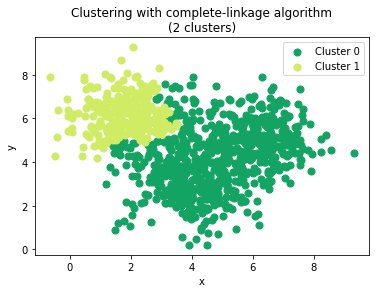

V-Measure: 0.41945872586038874
Davies-Bouldin score: 0.8000627894867816


In [47]:
model_complete_2_labels, model_complete_2_vmeasure, model_complete_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[1])

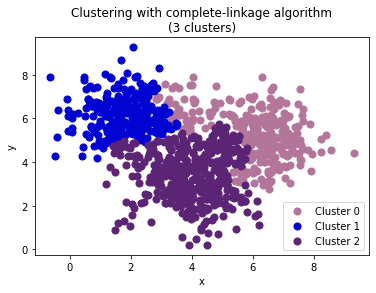

V-Measure: 0.5163337327548704
Davies-Bouldin score: 0.916260747579198


In [48]:
model_complete_3_labels, model_complete_3_vmeasure, model_complete_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[1])

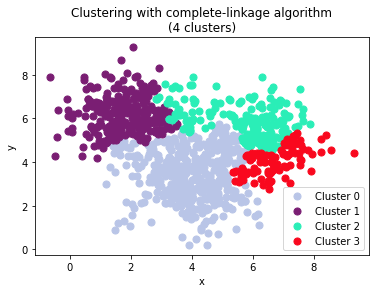

V-Measure: 0.5004201433006226
Davies-Bouldin score: 0.9436784939844054


In [49]:
model_complete_4_labels, model_complete_4_vmeasure, model_complete_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[1])

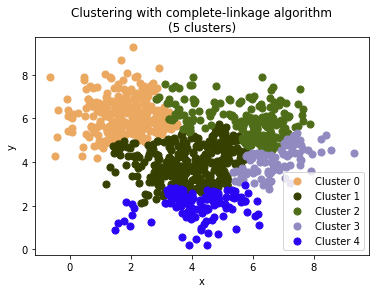

V-Measure: 0.47947792959873214
Davies-Bouldin score: 1.0272625471893735


In [50]:
model_complete_5_labels, model_complete_5_vmeasure, model_complete_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[1])

In [51]:
model_complete_vmeasures = [model_complete_2_vmeasure,
                            model_complete_3_vmeasure,
                            model_complete_4_vmeasure,
                            model_complete_5_vmeasure]

model_complete_davies_bouldin = [model_complete_2_davies_bouldin,
                                 model_complete_3_davies_bouldin,
                                 model_complete_4_davies_bouldin,
                                 model_complete_5_davies_bouldin]

In [52]:
df_complete_measures = pd.DataFrame(data=[model_complete_vmeasures, model_complete_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_complete_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.419459,0.516334,0.500420,0.479478
Davies-Bouldin,0.800063,0.916261,0.943678,1.027263


The complete-linkage clusters, if we compare it with single-linkage, was able to create clusters from more than just one point. It is an improvement, and it is also reflected in the scores for both V-measure and Davies-Bouldin score (3 clusters with single linkage v-measure of 0.003 and in this case it has 0.516). However, the scores are not particularly high, so even if we can say that there has been an improvement, it is still not a good algorithm to clusterize this dataset.

#### **3.1.3. Average-linkage** <a class="anchor" id="third-first-third-bullet"></a>

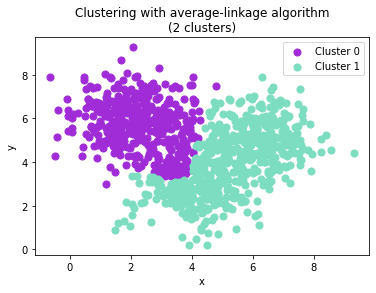

V-Measure: 0.48062248309657724
Davies-Bouldin score: 0.942854975042361


In [53]:
model_average_2_labels, model_average_2_vmeasure, model_average_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[2])

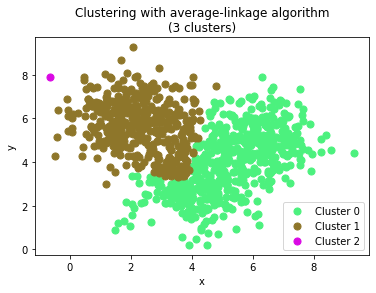

V-Measure: 0.4789975283747191
Davies-Bouldin score: 0.7581952788121882


In [54]:
model_average_3_labels, model_average_3_vmeasure, model_average_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[2])

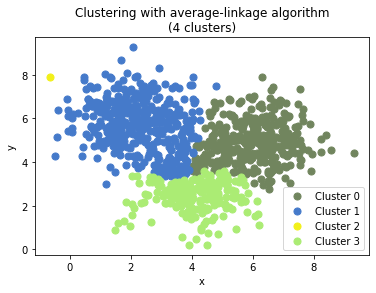

V-Measure: 0.5983718210744189
Davies-Bouldin score: 0.6388929033544526


In [55]:
model_average_4_labels, model_average_4_vmeasure, model_average_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[2])

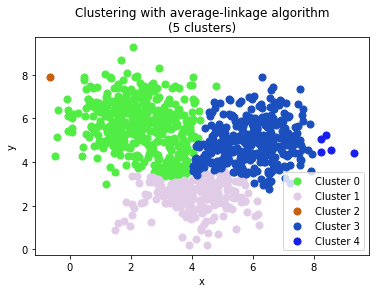

V-Measure: 0.5919020513679816
Davies-Bouldin score: 0.6378914206179349


In [56]:
model_average_5_labels, model_average_5_vmeasure, model_average_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[2])

In [57]:
model_average_vmeasures = [model_average_2_vmeasure,
                           model_average_3_vmeasure,
                           model_average_4_vmeasure,
                           model_average_5_vmeasure]

model_average_davies_bouldin = [model_average_2_davies_bouldin,
                                model_average_3_davies_bouldin,
                                model_average_4_davies_bouldin,
                                model_average_5_davies_bouldin]

In [58]:
df_average_measures = pd.DataFrame(data=[model_average_vmeasures, model_average_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_average_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.480622,0.478998,0.598372,0.591902
Davies-Bouldin,0.942855,0.758195,0.638893,0.637891


The average-linkage algorithm has similar results to the complete-linkage. In this case, the clustering made with 5 clusters gives the best V-measure (0.59). However, it is 2 clusters more than the original clusters, so it is not an appropiate clustering. Notice how the clusters with fewer points have 1 point (purple) and 5 points (cobalt blue). 

#### **3.1.4. Ward-linkage** <a class="anchor" id="third-first-fourth-bullet"></a>

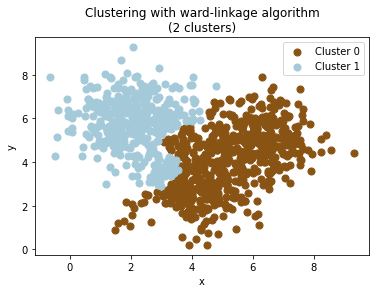

V-Measure: 0.47890288296452077
Davies-Bouldin score: 0.8950479110819423


In [59]:
model_ward_2_labels, model_ward_2_vmeasure, model_ward_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[3])

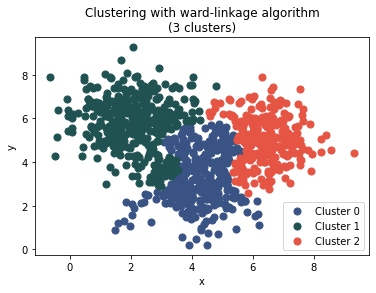

V-Measure: 0.5658339993891673
Davies-Bouldin score: 0.8731741968767136


In [60]:
model_ward_3_labels, model_ward_3_vmeasure, model_ward_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[3])

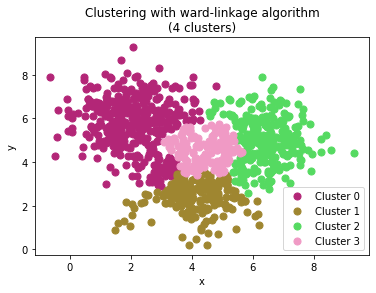

V-Measure: 0.5683271632783056
Davies-Bouldin score: 0.8906611987707955


In [61]:
model_ward_4_labels, model_ward_4_vmeasure, model_ward_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[3])

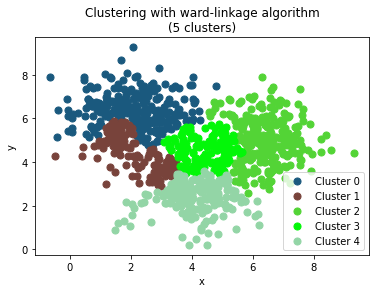

V-Measure: 0.5511749866400942
Davies-Bouldin score: 0.9940830243100187


In [62]:
model_ward_5_labels, model_ward_5_vmeasure, model_ward_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[3])

In [63]:
model_ward_vmeasures = [model_ward_2_vmeasure,
                        model_ward_3_vmeasure,
                        model_ward_4_vmeasure,
                        model_ward_5_vmeasure]

model_ward_davies_bouldin = [model_ward_2_davies_bouldin,
                             model_ward_3_davies_bouldin,
                             model_ward_4_davies_bouldin,
                             model_ward_5_davies_bouldin]

In [64]:
df_ward_measures = pd.DataFrame(data=[model_ward_vmeasures, model_ward_davies_bouldin],
                                  columns =['2 clusters', '3 clusters', '4 clusters', '5 clusters'],
                                 index=['V-measure', 'Davies-Bouldin'])
df_ward_measures

,2 clusters,3 clusters,4 clusters,5 clusters
V-measure,0.478903,0.565834,0.568327,0.551175
Davies-Bouldin,0.895048,0.873174,0.890661,0.994083


In [65]:
model_vmeasures = [model_single_vmeasures, model_complete_vmeasures, model_average_vmeasures, model_ward_vmeasures]
model_davies_bouldin = [model_single_davies_bouldin,
                        model_complete_davies_bouldin,
                        model_average_davies_bouldin,
                        model_ward_davies_bouldin]

Lastly, the Ward algorithm has not given better results for any of the measures. 

### **3.2. Best number of clusters for each algorithm** <a class="anchor" id="third-second-bullet"></a>

In [66]:
data_best_clusters = [["Single-linkage", clusters[model_single_vmeasures.index(max(model_single_vmeasures))], clusters[model_single_davies_bouldin.index(min(model_single_davies_bouldin))]],
                      ["Complete-linkage", clusters[model_complete_vmeasures.index(max(model_complete_vmeasures))], clusters[model_complete_davies_bouldin.index(min(model_complete_davies_bouldin))]], 
                      ["Average-linkage", clusters[model_average_vmeasures.index(max(model_average_vmeasures))], clusters[model_average_davies_bouldin.index(min(model_average_davies_bouldin))]],
                      ["Ward", clusters[model_ward_vmeasures.index(max(model_ward_vmeasures))], clusters[model_ward_davies_bouldin.index(min(model_ward_davies_bouldin))]]]
df_best_clusters = pd.DataFrame(data_best_clusters, columns = ["Algorithm", "V-Measure", "Davies-Bouldin"])

In [67]:
dfStyler = df_best_clusters.style.set_properties(**{'text-align': 'center'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Algorithm,V-Measure,Davies-Bouldin
0,Single-linkage,5,2
1,Complete-linkage,3,2
2,Average-linkage,4,5
3,Ward,4,3


Notice how in this case the measures do not agree on which clustering is best for any given algorithm. Also, only in 2 cases the best clustering is equal to the original clustering (3 clusters). 

### **3.3. Best algorithm and number of clusters** <a class="anchor" id="third-third-bullet"></a>

#### **3.3.1. V-Measure** <a class="anchor" id="third-third-first-bullet"></a>

In [68]:
max_vmeasure = [max(model_single_vmeasures), max(model_complete_vmeasures), max(model_average_vmeasures), max(model_ward_vmeasures)]

best_algorithm = max_vmeasure.index(max(max_vmeasure))
best_cluster = model_vmeasures[best_algorithm].index(max(model_vmeasures[best_algorithm]))

print(f"The algorihtm that gives the best results is {algorithms[best_algorithm]} with {clusters[best_cluster]} clusters.")

The algorihtm that gives the best results is average with 4 clusters.


In [69]:
cm = contingency_matrix(y_2.reshape(y_2.shape[0]).tolist(), model_average_4_labels)
s = homogeneity_completeness_v_measure (y_2.reshape(y_2.shape[0]).tolist() , model_average_4_labels, beta=1.0)

In [70]:
cm

array([[ 54,  74,   0, 206],
       [312,  16,   0,   5],
       [  1, 330,   1,   1]])

We can see that there is one cluster with a single data point. In the case of the other clusters, many points have been missclassified, as it was expected: since the clusters overlap eachother, it is more difficult to determine precisely which point belongs to each cluster in those areas where the points from 2+ clusters are mixed together. 

In [71]:
s

(0.5900311185188911, 0.6069517138150028, 0.5983718210744189)

The V-measure fot the average-linkage clustering made with 4 clusters is **0.5983**.

#### **3.3.2. Davies-Bouldin Score** <a class="anchor" id="third-third-second-bullet"></a>

In [72]:
min_davies_bouldin = [min(model_single_davies_bouldin), min(model_complete_davies_bouldin), min(model_average_davies_bouldin), min(model_ward_davies_bouldin)]
min_davies_bouldin

best_algorithm = min_davies_bouldin.index(min(min_davies_bouldin))
best_cluster = model_davies_bouldin[best_algorithm].index(min(model_davies_bouldin[best_algorithm]))

print(f"The algorihtm that gives the best results is {algorithms[best_algorithm]} with {clusters[best_cluster]} clusters.")

The algorihtm that gives the best results is single with 2 clusters.


In [73]:
cm = contingency_matrix(y_2.reshape(y_2.shape[0]).tolist(), model_single_2_labels)
s = homogeneity_completeness_v_measure (y_2.reshape(y_2.shape[0]).tolist() , model_single_2_labels, beta=1.0)

In [74]:
cm

array([[334,   0],
       [333,   0],
       [332,   1]])

In this case, one cluster has only one point and the rest of the data points are in the other cluster. This is not correct, as no information from the original clustering can be seen in this predicted clustering. It may be the best clustering when looking at the Davies-Bouldin score, but it does not work correctly.

In [75]:
s

(0.001001824430567441, 0.13919060576606782, 0.0019893306531079003)

The Davies-Bouldin score of the single-linkage algorithm with 2 clusters is **0.00198**.